In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
import math

In [4]:
# Read initial files in
# df1 = pd.read_csv("sample_files.txt",sep = ",")
headers = list(pd.read_csv("cols_varscan.txt",sep = "\t").columns)
df_pandas = pd.read_csv("veryexonic.txt",sep = "\t",names = headers)

In [4]:
# Why not?
df1 = df_pandas

In [113]:
# Get list of columns containing "AF"
AF_list = ['AF','AF_afr',
 'AF_sas',
 'AF_amr',
 'AF_eas',
 'AF_nfe',
 'AF_fin',
 'AF_asj',
 'AF_oth']

# Filter data.
df2 = df1[(df1['AF'] != '0') & (df1['AF'] != '.') & (df1['AF_afr'] != '.') & (df1['AF_sas'] != '.') & (df1['AF_amr'] != '.') & (df1['AF_eas'] != '.') & (df1['AF_nfe'] != '.') & (df1['AF_fin'] != '.') & (df1['AF_asj'] != '.') & (df1['AF_oth'] != '.') ]

# Isolate allele frequency data
data = df2.to_numpy()[:,43:51]
data = data.astype('float')

In [114]:
# Normalise data
norm_data = (data - np.sum(data,axis = 1).reshape(-1,1)/data.shape[1])/np.sqrt(np.var(data,axis = 1).reshape(-1,1))

var_vector1 = np.var(data,axis = 1)
stdev_vector1 = np.sqrt(var_vector1)

/Users/kennethpienta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/kennethpienta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [152]:
a = df2.to_numpy()[np.where(stdev_vector1 >= 0.1)]

In [1]:
a[4,43:51]

NameError: name 'a' is not defined

In [ ]:
plt.plot(a[:,42],stdev_vector1[np.where(stdev_vector1 >= 0.1)])

In [147]:
selected_data = norm_data[np.where(stdev_vector1 >= 0.1)]

In [139]:
selected_data.shape

(493, 8)

In [140]:
max_list = list(i for j in range(selected_data.shape[0]) for i in range(selected_data.shape[1]) if selected_data[j][i] == np.max(selected_data,axis = 1)[j])  

In [141]:
max_list = sorted(max_list)

dict1 = {}

for elem in max_list:
    if elem in dict1.keys():
        dict1[elem] += 1
    else:
        dict1[elem] = 1

In [144]:
max_inds = np.argsort(np.array(max_list))

In [142]:
dict1

{0: 147, 1: 5, 2: 5, 3: 214, 4: 35, 5: 53, 6: 34}

Text(0.5,0,"['AF_afr', 'AF_sas', 'AF_amr', 'AF_eas', 'AF_nfe', 'AF_fin', 'AF_asj', 'AF_oth']")

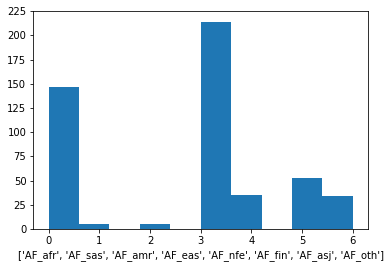

In [143]:
plt.hist(max_list)
plt.xlabel(AF_list[1:])

In [88]:
stdev_vector2 = np.sort(stdev_vector1)

stdev_vector3 = stdev_vector2[np.where(stdev_vector2 >= 0.0002)]

(array([  2.14515382e+01,   1.57367944e+00,   9.19547353e-01,
          4.41063740e-01,   1.68150865e-01,   3.82377930e-02,
          5.86176505e-03,   1.43136123e-03,   1.36320118e-04,
          1.36320118e-04]),
 array([ 0.        ,  0.04065076,  0.08130153,  0.12195229,  0.16260306,
         0.20325382,  0.24390459,  0.28455535,  0.32520612,  0.36585688,
         0.40650765]),
 <a list of 10 Patch objects>)

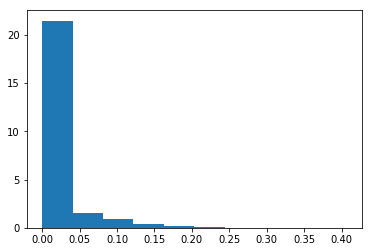

In [94]:
plt.hist(stdev_vector1,bins = 10,density = True)

In [6]:
foo = 'Sample'
bar = np.array(df_pandas.columns)
out = [i for i, v in enumerate(bar) if foo in v]
start_ind,stop_ind = out[0],out[-1]

sample_data = df2.to_numpy()[:,start_ind:stop_ind+1] # Extract samples from filtered data

In [7]:
sample_data[np.where(sample_data == '.')] = 0
sample_data[np.where(sample_data != 0)] = 1

In [8]:
z = np.zeros([sample_data.shape[0],sample_data.shape[1]])

for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        z[i][j] = sample_data[i][j]

In [9]:
z = np.transpose(z)

In [11]:
header_list = ['Chr',
 'Start',
 'End',
 'Ref',
 'Alt',
 'Func.refGene',
 'Gene.refGene',
 'GeneDetail.refGene',
 'ExonicFunc.refGene',
 'AAChange.refGene',
 'Func.ensGene',
 'Gene.ensGene',
 'GeneDetail.ensGene',
 'ExonicFunc.ensGene',
 'AAChange.ensGene','AF','AF_afr',
 'AF_sas',
 'AF_amr',
 'AF_eas',
 'AF_nfe',
 'AF_fin',
 'AF_asj',
 'AF_oth','DamagePredCount','Quality',
 'Coverage']

samples_header_list = []

for i in headers:
    if 'Sample' in i:
        samples_header_list.append(i)

In [12]:
samples_header_list = np.array(samples_header_list).reshape(-1,1)

In [13]:
stacked = np.vstack([headers,df2.to_numpy()])

In [14]:
stacked

array([['Chr', 'Start', 'End', ..., 'Sample_G4_9A_S8', 'Sample_110A',
        'Sample_2810_001'],
       ['chr1', 69270, 69270, ..., '.', '.', '.'],
       ['chr1', 69428, 69428, ..., '.', '.', '.'],
       ..., 
       ['chrY', 22942897, 22942897, ..., '.', '.', '.'],
       ['chrY', 23702603, 23702603, ..., '.', '.', '.'],
       ['chrY', 24551698, 24551698, ..., '.', '.', '.']], dtype=object)

In [15]:
# Extract relevant columns
relev_inds = list(headers.index(header) for header in header_list) # Column indices 
new = stacked[:,relev_inds]

In [ ]:
samples_header_list.shape,z.shape

((666, 1), (666, 367195))

In [16]:
sample_dat = np.hstack([samples_header_list,z]) # Sample_data

In [17]:
meta_dat = np.transpose(new)

In [18]:
final = np.vstack([meta_dat,sample_dat])

In [25]:
pd.DataFrame(final).to_csv("good_file.csv")

[Text(0.5, 0, 'Number of Patients Possessing A Given Variant'),
 Text(0, 0.5, 'How many such samples?')]

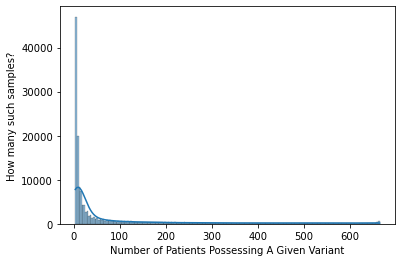

In [15]:
num_variants = np.sum(z,axis=1) # number of variants per sample
#sns.histplot(num_variants)

num_samples = np.sum(z, axis = 0) # number of samples with given variant.

sorted_ns = np.flip(np.sort(num_samples))
ax = sns.histplot(sorted_ns[0:155000],kde = True)
ax.set(xlabel = "Number of Patients Possessing A Given Variant", ylabel = "How many such samples?")

<AxesSubplot:>

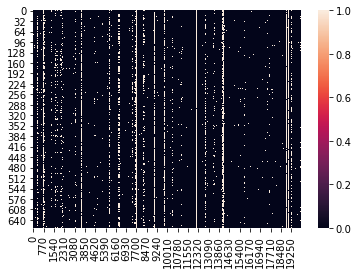

In [99]:
# Generate heatmap.
sns.heatmap(z[0:665,300000:320000])
# Consider downsizing your matrix?

In [17]:
def z_score(patient_id,allele_id,df):
    ''' Find z-score for Allele Frequencies'''
    AF_list = ['AF','AF_afr',
 'AF_sas',
 'AF_amr',
 'AF_eas',
 'AF_nfe',
 'AF_fin',
 'AF_asj',
 'AF_oth']
    
    AF_array = np.zeros([len(AF_list[1:])],dtype = 'float')

    for i in range(len(AF_list[1:])):
        AF_array[i] = float(df[AF_list[i]][allele_id])# Certain row from certain column in df_pandas
        
    #print(AF_array)
        
    mean = float(df[AF_list[0]][allele_id])
    stdev = math.sqrt(np.var(AF_array))
    
    norm_AF_array = (AF_array - mean)/stdev

    # Produce dictionary
    x = {i:norm_AF_array[i] for i in range(len(AF_list[1:]))}
    
    # Sort your AF_dict
    AF_dict = {k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse = True)}
    
    return AF_dict

In [18]:
z_score(1,1,df2)

{6: 1.3998707309540375,
 5: 1.0074383503100188,
 0: 0.0,
 7: -0.6150059696659999,
 3: -0.9020087555101332,
 2: -1.1421539436654282,
 1: -1.2417263387542092,
 4: -1.4350139292206663}

In [ ]:
num_patients = z.shape[0]
num_alleles = z.shape[1]

running_count = np.array([])
ethnicity = []

#for i in range(num_patients): # Iterate over patients

for i in range(num_patients):
    if i%5 == 0:
        print(i)
    for j in range(num_alleles): # Iterate over alleles
        
        condition = ((df_pandas['AF'][j] != '.') and (df_pandas['AF_afr'][j] != '.') & (df_pandas['AF_sas'][j] != '.') & (df_pandas['AF_amr'][j] != '.') & (df_pandas['AF_eas'][j] != '.') & (df_pandas['AF_nfe'][j] != '.') & (df_pandas['AF_fin'][j] != '.') & (df_pandas['AF_asj'][j] != '.') & (df_pandas['AF_oth'][j] != '.'))

        if z[i,j] == 1 and condition == True: # If patient has an allele
            
            
            top3 = np.array(list(z_score(i,j,df2).keys())[:3]) # Get top 3 ethnicities.
            
            #print(top3)
            running_count = np.concatenate((running_count,top3))   
            
    unique, counts = np.unique(running_count, return_counts=True)
        
    max_ind = np.where(counts == np.max(counts))[0][0]
    a = unique[max_ind]
    ethnicity.append(a)

0


<ipython-input-17-9ba1f0bf0a7e>:22: RuntimeWarning: invalid value encountered in true_divide
  norm_AF_array = (AF_array - mean)/stdev


5
10
15
20
25
30


In [1]:
ethnicity

NameError: name 'ethnicity' is not defined

In [177]:
np.where(counts == np.max(counts))[0][0]

0

In [159]:
df_pandas['AF'][318]

'.'